## Introduction
Our ultimate goal is to determine which neighborhood is the most environmentally friendly. The goal of my individual notebook is to determine which neighborhoods have the highest amount of trees, a large variety or trees, and the greatest amount of trees per square foot of the neighborhood. To determine these metrics, I used the Trees and Neighborhood datasets.

In [18]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

#DataFrame for the entire Trees dataset.
treesData = pd.read_csv("Trees.csv", low_memory = False)


In [19]:
#create dictionary to find out how many trees are in each neighborhood
treesdict = {}

#looping through the dataframe of the entire trees dataset and adding up all instances where the neighborhood appears
#to determine how many trees per neighborhood
for index, row in treesData.iterrows():
    if row['neighborhood'] in treesdict.keys():
        treesdict[row['neighborhood']] += 1
    else:
        treesdict[row['neighborhood']] = 1

In [20]:
#dataframe with the number of trees for each neighborhood
treesDf = pd.DataFrame(treesdict.items(), columns = ['Neighborhood','Number_of_trees'])

In [21]:
#a graph of the neighborhoods without the tree data
neighborhoods = geopandas.read_file("Neighborhoods_.shp")

In [22]:
#orders the number of trees for each neighborhood in descending order
num_trees = treesDf.groupby("Neighborhood").sum()['Number_of_trees']
num_trees.sort_values(ascending=False)

Neighborhood
Squirrel Hill South    5073
Highland Park          2941
Squirrel Hill North    2083
South Side Flats       1693
Shadyside              1558
                       ... 
Arlington Heights         5
Esplen                    3
Glen Hazel                2
South Shore               2
Hays                      1
Name: Number_of_trees, Length: 90, dtype: int64

In [23]:
# merges the num_trees to create the map
trees_map = neighborhoods.merge(num_trees, how='left', left_on='hood', right_on='Neighborhood')

Text(0.5, 1.0, 'Tree Quantity Across Pittsburgh')

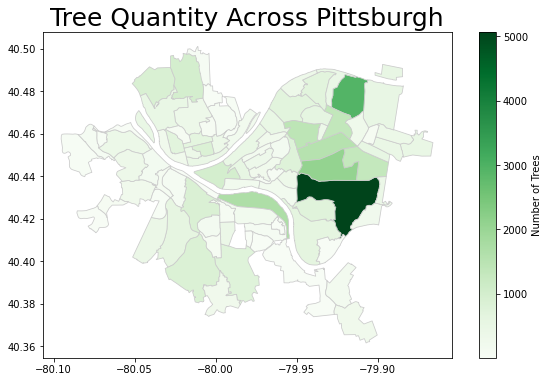

In [24]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Number_of_trees'
# set the range for the choropleth
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 6))

#color codes and labels the map for easy visualization
trees_map.plot(column=variable, cmap='Greens', legend = True, legend_kwds={'label': "Number of Trees"}, 
               linewidth=0.8,ax=ax,figsize=(15, 10), edgecolor='0.8')
ax.set_title('Tree Quantity Across Pittsburgh', fontdict={'fontsize': '25', 'fontweight' : '3'})

**Top 3 neighborhoods with the highest number of trees:**
1. Squirell Hill South has 5,073 trees.
2. Highland Park has 2941 trees.
3. Squirrel Hill North has 2083 trees.

In [9]:
#dictionary for the variety of trees
treeVarDict = {}

#loops through the entire dataframe for Trees.csv
for index, row in treesData.iterrows():
    if row['neighborhood'] not in treeVarDict:
        #creates a list and stores the variety of tree for each neighborhood
        treeVarDict[row['neighborhood']] = list()
    elif row['scientific_name'] in treeVarDict[row['neighborhood']]:
        #if the variety of the tree already exists in the list for the variable nothing happens
        rand = 0
    else:
        #if the variety of the tree does not already exist in the list for the variable then the variety is added to the list
        treeVarDict[row['neighborhood']].append(row['scientific_name'])
        

In [10]:
#dataframe for the neighborhoods and the different variety of trees in the neighborhood
treesVarDf = pd.DataFrame(treeVarDict.items(), columns = ['Neighborhood','Type of Tree'])


In [11]:
#dictionary for the count of different type of trees in each neighborhood
typeDict = {}

#loops through the treesVarDf to count up the types of trees in each neighborhood
for index, row in treesVarDf.iterrows():
    typeDict[row['Neighborhood']] = len(row['Type of Tree'])


In [12]:
#dataframe for the number of different tree types for each neighborhood
typeNumDf = pd.DataFrame(typeDict.items(), columns = ['Neighborhood','# of Different Tree Types'])


In [13]:
#orders the number of types for each neighborhood in descending order
num_type = typeNumDf.groupby("Neighborhood").sum()['# of Different Tree Types']
num_type.sort_values(ascending=False)

Neighborhood
Squirrel Hill South    143
Highland Park          137
Squirrel Hill North     91
Point Breeze            85
East Liberty            79
                      ... 
Arlington Heights        4
Esplen                   2
South Shore              1
Glen Hazel               1
Hays                     0
Name: # of Different Tree Types, Length: 90, dtype: int64

In [14]:
# do the merge
type_map = neighborhoods.merge(num_type, how='left', left_on='hood', right_on='Neighborhood')

Text(0.5, 1.0, 'Tree Variety Distribution Across Pittsburgh')

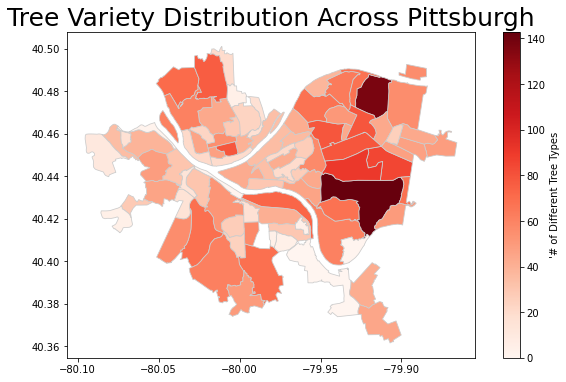

In [15]:
# set a variable that will call whatever column we want to visualise on the map
variable = '# of Different Tree Types'
# set the range for the choropleth
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 6))

#color codes and labels the map for easy visualization
type_map.plot(column=variable, cmap='Reds', legend = True, legend_kwds={'label': "'# of Different Tree Types"}, 
               linewidth=0.8,ax=ax,figsize=(15, 10), edgecolor='0.8')
ax.set_title('Tree Variety Distribution Across Pittsburgh', fontdict={'fontsize': '25', 'fontweight' : '3'})

**Top 3 neighborhoods with the most variety in trees:**
1. Squirell Hill South has 143 different tree types.

2. Highland Park has 137 different tree types.
3. Squirrel Hill North has 91 different tree types.

In [16]:
#dataframe for the size of each neighborhood
nbhd_sizes = pd.read_csv("Neighborhoods.csv", low_memory = False)

In [17]:

#dictionary for the neighborhood size and number of acres
nbhd_size_dict = {}

# looping through NeighborhoodSizes.csv to create dictionary with each neighborhood's size in acres
for index, row in nbhd_sizes.iterrows():
        nbhd_size_dict[row["hood"]] = row["acres"]

In [19]:
#dictionary for number of trees per acre
treeAcre_dict = {}
#print(treesdict)
#loops through the neighborhood size dictionary and adds the number of trees per acre to the new dictionary
for neighborhood in nbhd_size_dict:
    if nbhd_size_dict[neighborhood] != 0:
        treeAcre_dict[neighborhood] = (treesdict[neighborhood] / nbhd_size_dict[neighborhood])

In [20]:
#data frame for the number of trees per acre
treesAcreDf = pd.DataFrame(treeAcre_dict.items(), columns = ['Neighborhood','Trees per Acre'])
treesAcreDf = treesAcreDf.set_index('Neighborhood')
treesAcreDf = treesAcreDf.sort_values(by = ["Trees per Acre"], ascending = False)


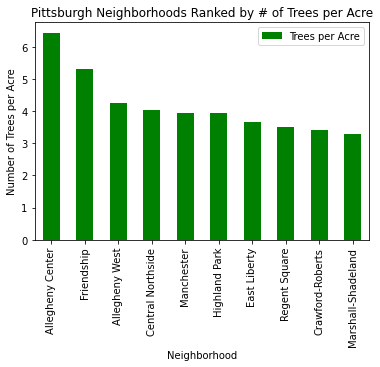

In [21]:
#Creates a bar graph using the tree per acre data frame
display(treesAcreDf.head(10).plot(kind = "bar", 
                                  color = 'green', 
                                  ylabel = "Number of Trees per Acre", 
                                  xlabel = "Neighborhood", 
                                  title = "Pittsburgh Neighborhoods Ranked by # of Trees per Acre"))

## Conclusion
Through analysis of the Trees and Neighborhoods datasets, the data showed that Squirrel Hill South had the highest number of trees and highest variety of trees across all of the neighborhoods. However, Allegheny Center had the highest number of trees per acre with over 6 trees per acre. In order to determine the most environmentally friendly neighborhood, we will need to combine this data with analysis from other datasets to determine the best neighborhood.